# Building graphs using data for the paper...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import balanced_accuracy_score, f1_score, accuracy_score

In [2]:
drug_data = pd.read_csv("data/Drug_Response.csv.gz",index_col = "Unnamed: 0") 

In [3]:
drug_data

,inhibitor,lab_id,ic50,auc
0,17-AAG (Tanespimycin),12-00211,10.000000,225.918025
1,17-AAG (Tanespimycin),12-00219,0.276661,135.264409
2,17-AAG (Tanespimycin),12-00258,2.722845,164.561227
3,17-AAG (Tanespimycin),12-00262,0.123136,111.555971
4,17-AAG (Tanespimycin),12-00268,10.000000,226.805281
...,...,...,...,...
47645,YM-155,17-00339,1.000000,252.706695
47646,YM-155,17-00350,1.000000,285.970101
47647,YM-155,17-00436,1.000000,286.264000
47648,YM-155,17-00442,0.303492,234.480225


In [4]:
data = pd.read_csv('data/accuracy_result_with_threshod.csv', index_col=0)

In [5]:
thresholds = pd.read_csv('data/selected_threshold_Apr22_2024.csv', index_col=0)

In [6]:
thresholds

,Drug,Threshold
0,Idelalisib,0.947315
1,JQ1,0.324788
2,Pazopanib (GW786034),2.299046
3,GDC-0941,0.582986
4,17-AAG (Tanespimycin),0.492055
...,...,...
58,Sunitinib,0.120411
59,Lestaurtinib (CEP-701),0.028444
60,Ibrutinib (PCI-32765),1.840545
61,Motesanib (AMG-706),3.925238


In [7]:
deep_model_results = pd.read_csv('data/pmid30704458_shinydeepr_patient_predicted_drugs.csv')

In [8]:
deep_model_results

,lab_id,drug,log_IC50_uM
0,15-00084,FK866,-6.25
1,15-00084,SN-38,-5.78
2,15-00084,Camptothecin,-5.70
3,15-00084,Epothilone_B,-5.64
4,15-00084,Bortezomib,-5.39
...,...,...,...
158200,17-00467,EX-527,5.26
158201,17-00467,DMOG,5.49
158202,17-00467,Cetuximab,6.04
158203,17-00467,Phenformin,6.12


In [9]:
drug_filtered_thresholds = []
for i, row in thresholds.iterrows():
    drug_threshold_table = data[(data.Drug==row.Drug) & (data.Threshold==row.Threshold)]
    drug_filtered_thresholds.append(drug_threshold_table)
drug_filtered_thresholds = pd.concat(drug_filtered_thresholds, axis=0)

In [10]:
drug_filtered_thresholds

,Drug,Threshold,Feature,ACC_train,F1_train,ACC1_2,ACC_w3_4,F1_w1_2,F1_w3_4
0,Idelalisib,0.947315,Mut,0.606348,0.352941,0.434783,0.541542,0.000000,0.214286
1,Idelalisib,0.947315,Mut,0.570186,0.261905,0.456522,0.533946,0.000000,0.185185
2,Idelalisib,0.947315,Mut,0.614320,0.377778,0.577640,0.525881,0.333333,0.178571
3,Idelalisib,0.947315,Mut,0.616712,0.382022,0.621118,0.556733,0.400000,0.266667
4,Idelalisib,0.947315,Mut,0.592857,0.313253,0.599379,0.530383,0.363636,0.156863
...,...,...,...,...,...,...,...,...,...
5555,NF-kB Activation Inhibitor,2.258802,Mut+RelativeExpr,1.000000,1.000000,0.722222,0.607446,0.600000,0.436782
5556,NF-kB Activation Inhibitor,2.258802,Mut+RelativeExpr,1.000000,1.000000,0.527778,0.585452,0.222222,0.370370
5557,NF-kB Activation Inhibitor,2.258802,Mut+RelativeExpr,1.000000,1.000000,0.694444,0.590496,0.545455,0.400000
5558,NF-kB Activation Inhibitor,2.258802,Mut+RelativeExpr,1.000000,1.000000,0.666667,0.579500,0.500000,0.365854


## Comparing prediction results for different datasets

In [11]:
selected_drugs = data.Drug.unique()
print(list(sorted(selected_drugs)))

['17-AAG (Tanespimycin)', 'A-674563', 'AT7519', 'AZD1480', 'Axitinib (AG-013736)', 'BEZ235', 'Bortezomib (Velcade)', 'Bosutinib (SKI-606)', 'CI-1040 (PD184352)', 'CYT387', 'Cabozantinib', 'Cediranib (AZD2171)', 'Crenolanib', 'Dasatinib', 'Doramapimod (BIRB 796)', 'Dovitinib (CHIR-258)', 'Elesclomol', 'Flavopiridol', 'Foretinib (XL880)', 'GDC-0941', 'GSK-1838705A', 'INK-128', 'Ibrutinib (PCI-32765)', 'Idelalisib', 'JAK Inhibitor I', 'JNJ-28312141', 'JQ1', 'KI20227', 'KW-2449', 'Lestaurtinib (CEP-701)', 'Linifanib (ABT-869)', 'MGCD-265', 'MK-2206', 'Masitinib (AB-1010)', 'Midostaurin', 'Motesanib (AMG-706)', 'NF-kB Activation Inhibitor', 'NVP-TAE684', 'Neratinib (HKI-272)', 'PD173955', 'PI-103', 'PP242', 'PRT062607', 'Panobinostat', 'Pazopanib (GW786034)', 'Pelitinib (EKB-569)', 'Ponatinib (AP24534)', 'Quizartinib (AC220)', 'RAF265 (CHIR-265)', 'Rapamycin', 'SNS-032 (BMS-387032)', 'Selinexor', 'Selumetinib (AZD6244)', 'Sorafenib', 'Sunitinib', 'Tivozanib (AV-951)', 'Tofacitinib (CP-69055

In [12]:
# make a grouped boxplot... plot balanced accuracy only, plot independent test set only, group by feature set
included_drugs = ['Venetoclax', 'Trametinib (GSK1120212)', 'Linifanib (ABT-869)', 'AT7519', 'Rapamycin', '17-AAG (Tanespimycin)',
                  'SNS-032 (BMS-387032)', 'Dasatinib',  'Axitinib (AG-013736)', 'Selumetinib (AZD6244)', 'JNJ-28312141',
                  'Ponatinib (AP24534)', 'Sorafenib', 'MK-2206', 'Foretinib (XL880)', 'GDC-0941', 'CI-1040 (PD184352)',
                  'KW-2449', 'Dovitinib (CHIR-258)', 'KI20227', 'Vargetef',  'Sunitinib', 'MGCD-265', 'Crenolanib', 'Tivozanib (AV-951)', 
                  'NF-kB Activation Inhibitor', 'Pelitinib (EKB-569)', 'Masitinib (AB-1010)', 'Neratinib (HKI-272)', ]

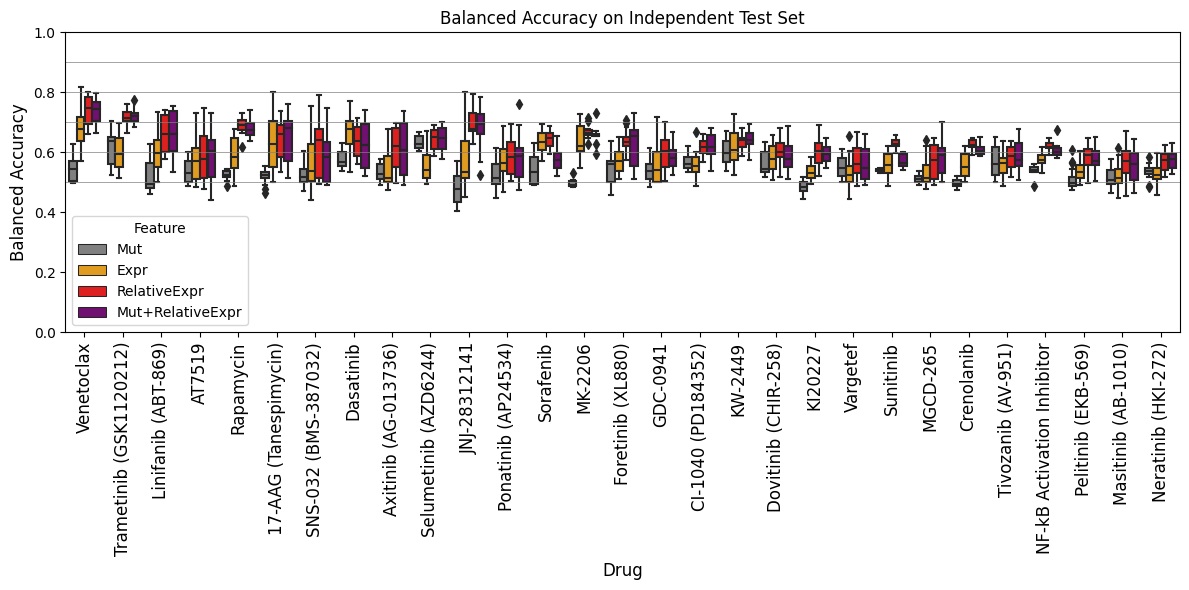

In [13]:
data_subset = data[data.Drug.map(lambda x: x in included_drugs)]

fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=data_subset, x='Drug', y='ACC_w3_4', hue='Feature', palette=["grey","orange" ,"red","purple"],
           order=included_drugs)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel('Balanced Accuracy', fontsize=12)
plt.xlabel('Drug', fontsize=12)
plt.title('Balanced Accuracy on Independent Test Set')
#ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1], minor=False)
#ax.yaxis.grid(True, which='major')
for acc in [0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    ax.axhline(acc, color='gray', linewidth=0.5)
#ax.xaxis.grid(True)
#ax.set_yticks([0., 0.1, 0.2, 0.3, 0.4], minor=False)
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig('balanced_accuracy_independent_test_set_all_thresholds.png')
plt.show()

In [14]:
# TODO: try doing all drugs
# take mean bacc for the 

ordered_drugs = drug_filtered_thresholds[drug_filtered_thresholds.Feature=='RelativeExpr'].groupby(by=['Drug']).aggregate('median')
ordered_drugs = ordered_drugs.sort_values('ACC_w3_4')[::-1]
ordered_drugs = ordered_drugs.index
#ordered_drugs = drug_filtered_thresholds.loc[drug_filtered_thresholds['ACC_w3_4'] > 0.6]

data_subset = data[data.Drug.map(lambda x: x in ordered_drugs)]

fig, ax = plt.subplots(figsize=(18, 6))
sns.boxplot(data=data_subset, x='Drug', y='ACC_w3_4', hue='Feature', palette=["grey","orange" ,"red","purple"],
           order=ordered_drugs)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel('Balanced Accuracy', fontsize=12)
plt.xlabel('Drug', fontsize=12)
plt.title('Balanced Accuracy on Independent Test Set')
#ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1], minor=False)
#ax.yaxis.grid(True, which='major')
for acc in [0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    ax.axhline(acc, color='gray', linewidth=0.5)
#ax.xaxis.grid(True)
#ax.set_yticks([0., 0.1, 0.2, 0.3, 0.4], minor=False)
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig('balanced_accuracy_independent_test_set_all_drugs_all_thresholds.png')
plt.show()

TypeError: agg function failed [how->median,dtype->object]

In [15]:
# TODO: try doing all drugs
# take mean bacc for the 

ordered_drugs = drug_filtered_thresholds[drug_filtered_thresholds.Feature=='RelativeExpr'].groupby(by=['Drug']).aggregate('median')
ordered_drugs = ordered_drugs.sort_values('ACC_w3_4')[::-1]
ordered_drugs = ordered_drugs.index
#ordered_drugs = drug_filtered_thresholds.loc[drug_filtered_thresholds['ACC_w3_4'] > 0.6]

data_subset = drug_filtered_thresholds[drug_filtered_thresholds.Drug.map(lambda x: x in ordered_drugs)]

fig, ax = plt.subplots(figsize=(18, 6))
sns.boxplot(data=data_subset, x='Drug', y='ACC_w3_4', hue='Feature', palette=["grey","orange" ,"red","purple"],
           order=ordered_drugs)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel('Balanced Accuracy', fontsize=12)
plt.xlabel('Drug', fontsize=12)
plt.title('Balanced Accuracy on Independent Test Set')
#ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1], minor=False)
#ax.yaxis.grid(True, which='major')
for acc in [0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    ax.axhline(acc, color='gray', linewidth=0.5)
#ax.xaxis.grid(True)
#ax.set_yticks([0., 0.1, 0.2, 0.3, 0.4], minor=False)
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig('balanced_accuracy_independent_test_set_all_drugs_best_thresholds.png')
plt.show()

TypeError: agg function failed [how->median,dtype->object]

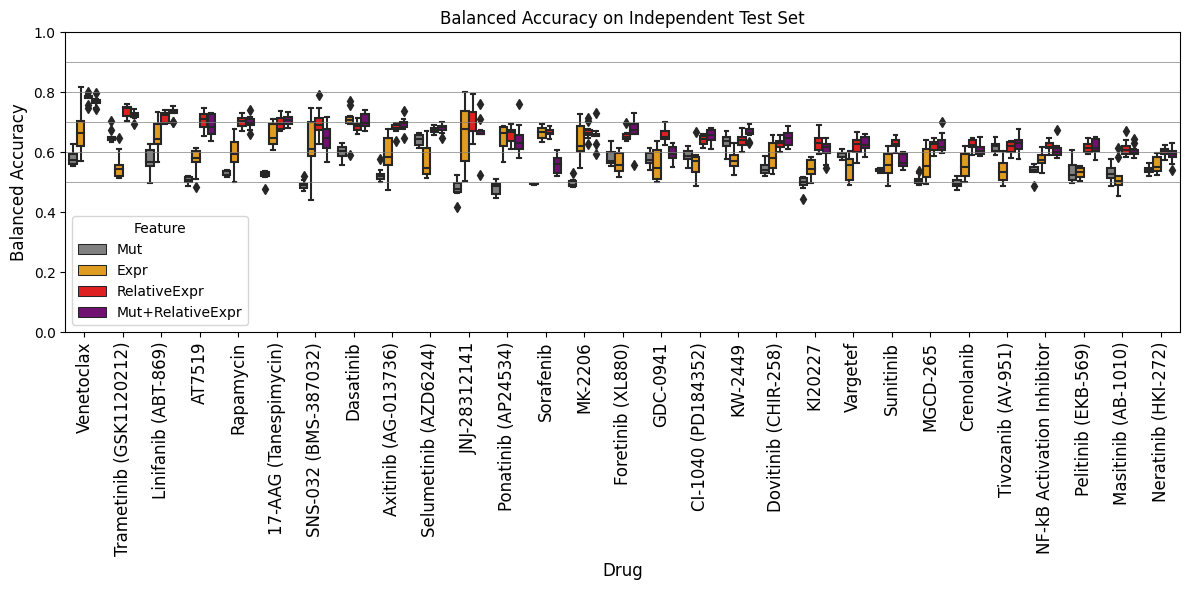

In [16]:
data_subset = drug_filtered_thresholds[drug_filtered_thresholds.Drug.map(lambda x: x in included_drugs)]

fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=data_subset, x='Drug', y='ACC_w3_4', hue='Feature', palette=["grey","orange" ,"red","purple"],
           order=included_drugs)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel('Balanced Accuracy', fontsize=12)
plt.xlabel('Drug', fontsize=12)
plt.title('Balanced Accuracy on Independent Test Set')
#ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1], minor=False)
#ax.yaxis.grid(True, which='major')
for acc in [0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    ax.axhline(acc, color='gray', linewidth=0.5)
#ax.xaxis.grid(True)
#ax.set_yticks([0., 0.1, 0.2, 0.3, 0.4], minor=False)
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig('balanced_accuracy_independent_test_set_best_threshold.png')
plt.show()

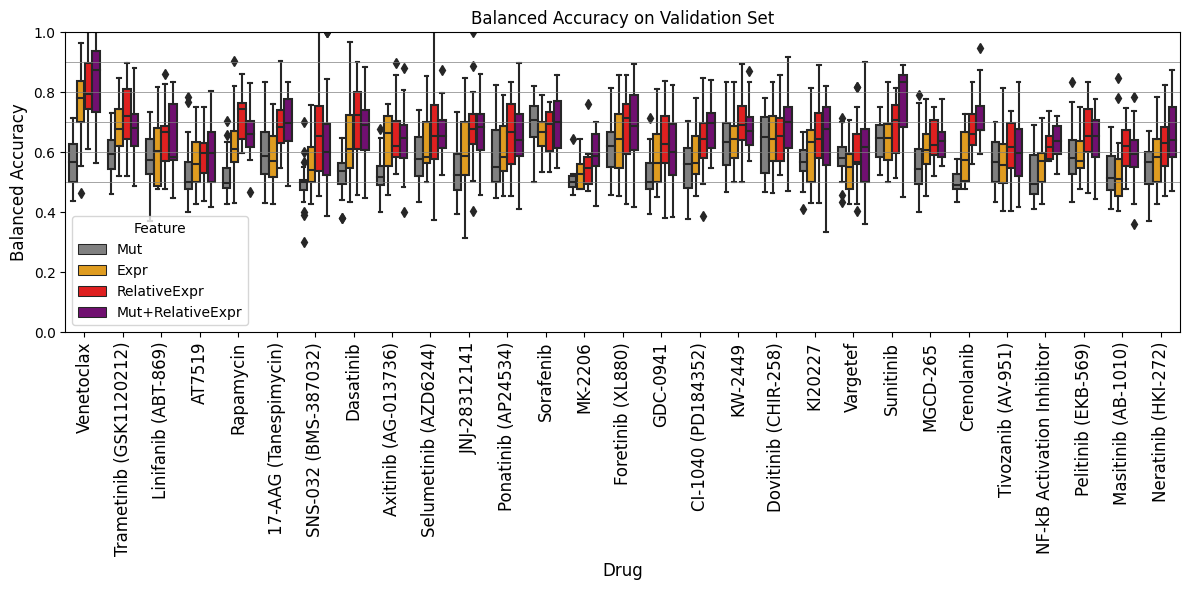

In [17]:
data_subset = data[data.Drug.map(lambda x: x in included_drugs)]
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=data_subset, x='Drug', y='ACC1_2', hue='Feature', palette=["grey","orange" ,"red","purple"],
           order=included_drugs)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel('Balanced Accuracy', fontsize=12)
plt.xlabel('Drug', fontsize=12)
plt.title('Balanced Accuracy on Validation Set')
for acc in [0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    ax.axhline(acc, color='gray', linewidth=0.5)
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig('balanced_accuracy_validation_set_all_thresholds.png')
plt.show()

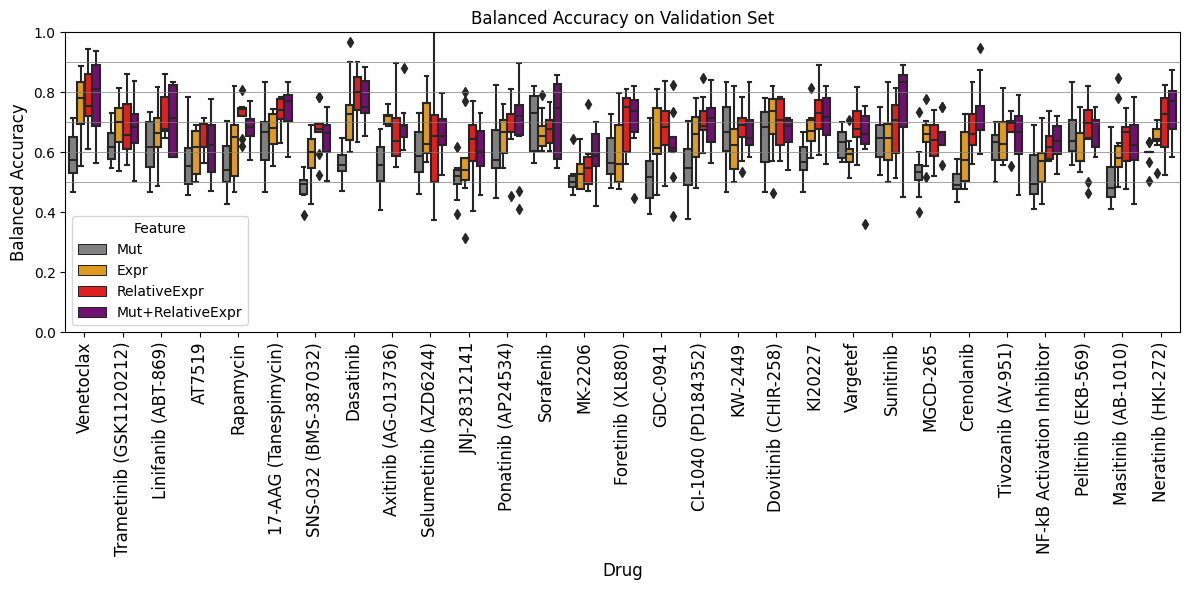

In [18]:
data_subset = drug_filtered_thresholds[drug_filtered_thresholds.Drug.map(lambda x: x in included_drugs)]
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=data_subset, x='Drug', y='ACC1_2', hue='Feature', palette=["grey","orange" ,"red","purple"],
           order=included_drugs)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel('Balanced Accuracy', fontsize=12)
plt.xlabel('Drug', fontsize=12)
plt.title('Balanced Accuracy on Validation Set')
for acc in [0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    ax.axhline(acc, color='gray', linewidth=0.5)
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig('balanced_accuracy_validation_set_best_threshold.png')
plt.show()

### Comparing results for different drugs and different feature sets using paired wilcoxon test

In [19]:
import scipy.stats

In [20]:
# for every drug: do 4x4 wilcoxon signed-rank tests for balanced accuracy, comparing each of the 4 datasets.
all_wilcoxon = {}
all_scores_differences = {}
mean_drug_scores = {}
'ACC_train 	F1_train'
comparison_methods = 'ACC1_2 	ACC_w3_4 	F1_w1_2 	F1_w3_4'.split()
feature_sets = ['Mut', 'Expr', 'RelativeExpr', 'Mut+RelativeExpr'] 
for i, row in thresholds.iterrows():
    drug_wilcoxon = {}
    drug_scores_differences = {}
    mean_drug_scores[row.Drug] = {}
    best_threshold_table = data[(data.Drug==row.Drug) & (data.Threshold==row.Threshold)]
    all_thresholds_table = data[data.Drug==row.Drug]
    groups = best_threshold_table.groupby('Feature')
    compared = set()
    for g1, indices1 in groups.groups.items():
        for m in comparison_methods:
            mean_drug_scores[row.Drug][m + '_' + g1] = np.median(best_threshold_table.loc[indices1][m].to_numpy())
        for g2, indices2 in groups.groups.items():
            if g1 != g2 and (g1, g2) not in compared:
                compared.add((g2, g1))
                compared.add((g1, g2))
                for m in comparison_methods:
                    drug_scores_differences[m + '_' + g1 + '-vs-' + g2] = np.median(best_threshold_table.loc[indices1][m].to_numpy()- best_threshold_table.loc[indices2][m].to_numpy())
                    try:
                        drug_wilcoxon[m + '_' + g1 + '-vs-' + g2] = scipy.stats.wilcoxon(best_threshold_table.loc[indices1][m],
                                                                                 best_threshold_table.loc[indices2][m]).pvalue
                    except ValueError:
                        drug_wilcoxon[m + '_' + g1 + '-vs-' + g2] = 1
    all_wilcoxon[row.Drug] = drug_wilcoxon
    all_scores_differences[row.Drug] = drug_scores_differences

/home/yzhang/.pyenv/versions/3.10.6/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/yzhang/.pyenv/versions/3.10.6/lib/python3.10/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
/home/yzhang/.pyenv/versions/3.10.6/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/yzhang/.pyenv/versions/3.10.6/lib/python3.10/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation

In [21]:
best_threshold_table.loc[indices2][m]

5540    0.468085
5541    0.488372
5542    0.417582
5543    0.447059
5544    0.465116
5545    0.409091
5546    0.500000
5547    0.461538
5548    0.414634
5549    0.436782
Name: F1_w3_4, dtype: float64

In [22]:
best_threshold_table.loc[indices1][m]

5540    0.468085
5541    0.488372
5542    0.417582
5543    0.447059
5544    0.465116
5545    0.409091
5546    0.500000
5547    0.461538
5548    0.414634
5549    0.436782
Name: F1_w3_4, dtype: float64

In [23]:
all_wilcoxon = pd.DataFrame(all_wilcoxon).T

In [24]:
all_wilcoxon_fdr_corrected = all_wilcoxon.copy()
all_wilcoxon_fdr_corrected.loc[:,:] = scipy.stats.false_discovery_control(all_wilcoxon, axis=1)

In [25]:
all_wilcoxon_fdr_corrected

,ACC1_2_Expr-vs-Mut,ACC_w3_4_Expr-vs-Mut,F1_w1_2_Expr-vs-Mut,F1_w3_4_Expr-vs-Mut,ACC1_2_Expr-vs-Mut+RelativeExpr,ACC_w3_4_Expr-vs-Mut+RelativeExpr,F1_w1_2_Expr-vs-Mut+RelativeExpr,F1_w3_4_Expr-vs-Mut+RelativeExpr,ACC1_2_Expr-vs-RelativeExpr,ACC_w3_4_Expr-vs-RelativeExpr,...,F1_w1_2_Mut-vs-Mut+RelativeExpr,F1_w3_4_Mut-vs-Mut+RelativeExpr,ACC1_2_Mut-vs-RelativeExpr,ACC_w3_4_Mut-vs-RelativeExpr,F1_w1_2_Mut-vs-RelativeExpr,F1_w3_4_Mut-vs-RelativeExpr,ACC1_2_Mut+RelativeExpr-vs-RelativeExpr,ACC_w3_4_Mut+RelativeExpr-vs-RelativeExpr,F1_w1_2_Mut+RelativeExpr-vs-RelativeExpr,F1_w3_4_Mut+RelativeExpr-vs-RelativeExpr
Idelalisib,0.517969,0.009375,0.506292,0.009375,0.103125,0.074219,0.103125,0.039062,0.184743,0.009375,...,0.050110,0.045468,0.050110,0.580842,0.045468,0.009375,0.580842,0.500000,0.625000,0.580842
JQ1,0.009375,1.000000,0.009375,0.386719,0.154688,0.834375,0.111328,0.642857,0.429087,1.000000,...,0.009375,0.093750,0.015625,0.738281,0.009375,0.130208,0.834375,0.785846,0.833333,0.879464
Pazopanib (GW786034),0.134375,1.000000,0.215239,1.000000,0.758523,0.215239,0.368304,0.023438,0.023548,0.006696,...,0.030134,0.006696,0.006696,0.006696,0.006696,0.006696,0.330469,0.158203,0.269715,0.046875
GDC-0941,0.080966,0.348633,0.331473,0.041016,0.667969,0.295673,1.000000,0.039062,0.966518,0.015625,...,0.407072,0.041016,0.046875,0.015625,0.348633,0.015625,0.407072,0.018750,1.000000,0.046875
17-AAG (Tanespimycin),0.636161,0.009375,0.681818,0.023438,0.059659,0.058594,0.195728,0.059659,0.155048,0.046875,...,0.347862,0.009375,0.168750,0.009375,0.195728,0.009375,0.802989,0.386719,0.845703,0.309896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sunitinib,0.921875,0.440625,0.647951,0.295673,0.295673,0.529412,0.295673,0.636161,0.636161,0.006696,...,0.201563,0.006696,0.575521,0.006696,0.621711,0.006696,0.331473,0.006696,0.483398,0.006696
Lestaurtinib (CEP-701),0.417626,0.774283,0.392100,0.392100,0.600000,0.202779,0.417626,0.392100,0.739212,0.827016,...,0.247361,1.000000,0.280681,1.000000,0.392100,1.000000,0.739212,0.202779,0.417626,1.000000
Ibrutinib (PCI-32765),1.000000,0.021307,0.636161,0.006696,0.042603,0.006696,0.031921,0.006696,0.035601,0.020353,...,0.165296,0.006696,0.140625,0.042603,0.090993,0.021307,0.994190,0.006696,0.994190,0.017578
Motesanib (AMG-706),0.224330,0.018750,0.367188,0.054688,0.839489,0.794643,1.000000,1.000000,0.224330,0.367188,...,0.367188,0.011719,0.098958,0.011719,0.098958,0.011719,0.407072,0.224330,0.224330,0.093750


In [26]:
all_scores_differences = pd.DataFrame(all_scores_differences).T
all_scores_differences

,ACC1_2_Expr-vs-Mut,ACC_w3_4_Expr-vs-Mut,F1_w1_2_Expr-vs-Mut,F1_w3_4_Expr-vs-Mut,ACC1_2_Expr-vs-Mut+RelativeExpr,ACC_w3_4_Expr-vs-Mut+RelativeExpr,F1_w1_2_Expr-vs-Mut+RelativeExpr,F1_w3_4_Expr-vs-Mut+RelativeExpr,ACC1_2_Expr-vs-RelativeExpr,ACC_w3_4_Expr-vs-RelativeExpr,...,F1_w1_2_Mut-vs-Mut+RelativeExpr,F1_w3_4_Mut-vs-Mut+RelativeExpr,ACC1_2_Mut-vs-RelativeExpr,ACC_w3_4_Mut-vs-RelativeExpr,F1_w1_2_Mut-vs-RelativeExpr,F1_w3_4_Mut-vs-RelativeExpr,ACC1_2_Mut+RelativeExpr-vs-RelativeExpr,ACC_w3_4_Mut+RelativeExpr-vs-RelativeExpr,F1_w1_2_Mut+RelativeExpr-vs-RelativeExpr,F1_w3_4_Mut+RelativeExpr-vs-RelativeExpr
Idelalisib,0.012562,0.089674,0.055556,0.264732,-0.075794,0.054200,-0.219530,0.107207,-0.033929,0.069226,...,-0.436508,-0.193166,-0.111646,-0.020448,-0.217172,-0.118435,0.042659,0.023756,0.083333,0.031653
JQ1,0.186806,-0.004091,0.190476,-0.114060,-0.048611,-0.003443,-0.041353,-0.026992,-0.069472,-0.002869,...,-0.231548,0.078124,-0.259912,0.004837,-0.285695,0.076943,-0.058296,0.008612,-0.025800,-0.005374
Pazopanib (GW786034),0.040000,-0.000648,0.063059,0.008333,-0.075148,-0.005667,-0.181326,-0.125813,-0.061594,-0.045133,...,-0.218182,-0.136328,-0.109991,-0.045694,-0.238384,-0.218382,-0.043116,-0.028650,-0.083333,-0.088509
GDC-0941,0.156481,-0.026201,0.069543,-0.292412,-0.016182,-0.019659,-0.091078,-0.399598,-0.023810,-0.118356,...,-0.079677,-0.077410,-0.187500,-0.071875,-0.117057,-0.095654,-0.010011,-0.062648,-0.064905,-0.054637
17-AAG (Tanespimycin),0.021154,0.113158,-0.010864,0.215253,-0.055403,-0.053984,-0.061013,-0.078990,-0.034341,-0.047587,...,-0.100123,-0.280080,-0.076282,-0.165918,-0.056397,-0.298549,-0.003892,0.011026,0.015629,-0.026637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sunitinib,0.003998,0.017880,-0.014797,0.140867,-0.175751,-0.019075,-0.228555,-0.017068,0.007764,-0.056250,...,-0.239705,-0.110430,-0.062616,-0.090265,-0.095971,-0.271244,0.078597,-0.054278,0.144589,-0.144981
Lestaurtinib (CEP-701),0.000000,0.000000,0.000000,0.000000,-0.085714,0.500000,-0.125000,0.000000,0.000000,0.000000,...,-0.125000,0.000000,-0.050000,0.000000,0.000000,0.000000,-0.019841,-0.250000,0.000000,0.000000
Ibrutinib (PCI-32765),-0.006294,-0.010763,-0.024531,-0.160375,-0.085545,-0.083108,-0.202778,-0.361079,-0.098684,-0.042208,...,-0.141270,-0.217305,-0.081055,-0.031967,-0.135014,-0.122482,-0.030057,0.031656,-0.070707,0.088023
Motesanib (AMG-706),0.052089,0.062343,0.125000,0.212688,-0.006938,-0.004741,-0.100000,0.015250,-0.094494,-0.017257,...,-0.198485,-0.149860,-0.177042,-0.065801,-0.430556,-0.235189,-0.016207,-0.010701,-0.042857,-0.062091


In [27]:
mean_drug_scores = pd.DataFrame(mean_drug_scores).T

In [28]:

acc_columns = [x for x in mean_drug_scores.columns if x.startswith('ACC')]
mean_drug_scores.loc[:, acc_columns]

,ACC1_2_Expr,ACC_w3_4_Expr,ACC1_2_Mut,ACC_w3_4_Mut,ACC1_2_Mut+RelativeExpr,ACC_w3_4_Mut+RelativeExpr,ACC1_2_RelativeExpr,ACC_w3_4_RelativeExpr
Idelalisib,0.498214,0.624079,0.477767,0.532164,0.629861,0.569916,0.616071,0.557617
JQ1,0.645833,0.536227,0.425000,0.541332,0.697917,0.542892,0.744571,0.537572
Pazopanib (GW786034),0.572464,0.512328,0.522500,0.515297,0.616667,0.527288,0.632908,0.554674
GDC-0941,0.613095,0.548788,0.517857,0.572579,0.612719,0.595486,0.684524,0.650730
17-AAG (Tanespimycin),0.681319,0.647951,0.666667,0.525794,0.770833,0.706897,0.741758,0.694262
...,...,...,...,...,...,...,...,...
Sunitinib,0.645963,0.559028,0.647500,0.541720,0.833333,0.565651,0.707316,0.627083
Lestaurtinib (CEP-701),0.500000,0.500000,0.500000,0.500000,0.535714,0.000000,0.500000,0.500000
Ibrutinib (PCI-32765),0.557018,0.500812,0.550325,0.513488,0.634478,0.584821,0.640351,0.547078
Motesanib (AMG-706),0.560606,0.573079,0.500812,0.513564,0.584211,0.572116,0.664286,0.578581


### Specifically comparing ACC_w3_4 (balanced accuracy on independent test set)

(question: for FDR-corrected p-value, should I do the FDR correction per drug or per feature? Or do I need to do FDR correction at all? or maybe along both axes...)

TODO: for all "best feature" per drug, determine if the best feature is significant.

In [29]:
mean_drug_scores.loc['Venetoclax', ['ACC_w3_4_Mut', 'ACC_w3_4_Expr', 'ACC_w3_4_RelativeExpr', 'ACC_w3_4_Mut+RelativeExpr']]

ACC_w3_4_Mut                 0.574705
ACC_w3_4_Expr                0.662815
ACC_w3_4_RelativeExpr        0.784589
ACC_w3_4_Mut+RelativeExpr    0.767267
Name: Venetoclax, dtype: float64

In [30]:
selected_pval_cols = [x for x in all_wilcoxon_fdr_corrected.columns if 'ACC_w3_4' in x]
all_wilcoxon_fdr_corrected_selected = all_wilcoxon_fdr_corrected.loc[:, selected_pval_cols]
all_wilcoxon_fdr_corrected_selected

,ACC_w3_4_Expr-vs-Mut,ACC_w3_4_Expr-vs-Mut+RelativeExpr,ACC_w3_4_Expr-vs-RelativeExpr,ACC_w3_4_Mut-vs-Mut+RelativeExpr,ACC_w3_4_Mut-vs-RelativeExpr,ACC_w3_4_Mut+RelativeExpr-vs-RelativeExpr
Idelalisib,0.009375,0.074219,0.009375,0.103125,0.580842,0.500000
JQ1,1.000000,0.834375,1.000000,1.000000,0.738281,0.785846
Pazopanib (GW786034),1.000000,0.215239,0.006696,0.036058,0.006696,0.158203
GDC-0941,0.348633,0.295673,0.015625,0.388787,0.015625,0.018750
17-AAG (Tanespimycin),0.009375,0.058594,0.046875,0.009375,0.009375,0.386719
...,...,...,...,...,...,...
Sunitinib,0.440625,0.529412,0.006696,0.006696,0.006696,0.006696
Lestaurtinib (CEP-701),0.774283,0.202779,0.827016,0.202779,1.000000,0.202779
Ibrutinib (PCI-32765),0.021307,0.006696,0.020353,0.006696,0.042603,0.006696
Motesanib (AMG-706),0.018750,0.794643,0.367188,0.011719,0.011719,0.224330


In [38]:
# for each drug, find the top-performing feature set by average balanced accuracy score on the independent test set.
# compare the p-value of that feature set to all other feature sets.
from collections import Counter
best_features_counter = Counter()
best_features_significant_counter = Counter()
best_features_insignificant_counter = Counter()
significance_threshold = 0.05
for i, row in mean_drug_scores.iterrows():
    row = row[[x for x in row.index if x.startswith('ACC_w3_4')]]
    if row.max() < 0.6:
        continue
    max_col = row.index[row.argmax()][9:]
    print('Drug:', i, ' - Best features:', max_col)
    # get significance
    pvals = all_wilcoxon_fdr_corrected_selected.loc[i]
    is_significant = True
    for k, v in pvals.items():
        k = k[9:]
        f1, f2 = k.split('-vs-')
        if f1 == max_col or f2 == max_col:
            print(f1, f2, v)
            # we're grouping the RelativeExpr with and without mutations together for comparison purposes...
            if (f1 == 'Mut+RelativeExpr' and f2 == 'RelativeExpr') or (f1 == 'RelativeExpr' and f2 == 'Mut+RelativeExpr'):
                continue
            if v > significance_threshold:
                is_significant = False
    best_features_counter[max_col] += 1
    if is_significant:
        best_features_significant_counter[max_col] += 1
    else:
        best_features_insignificant_counter[max_col] += 1
print()
print('Overall best features:')
print(best_features_counter)

Drug: Idelalisib  - Best features: Expr
Expr Mut 0.009375
Expr Mut+RelativeExpr 0.07421875
Expr RelativeExpr 0.009375
Drug: GDC-0941  - Best features: RelativeExpr
Expr RelativeExpr 0.015625
Mut RelativeExpr 0.015625
Mut+RelativeExpr RelativeExpr 0.01875
Drug: 17-AAG (Tanespimycin)  - Best features: Mut+RelativeExpr
Expr Mut+RelativeExpr 0.05859375
Mut Mut+RelativeExpr 0.009375
Mut+RelativeExpr RelativeExpr 0.38671875
Drug: Venetoclax  - Best features: RelativeExpr
Expr RelativeExpr 0.014062499999999999
Mut RelativeExpr 0.009375
Mut+RelativeExpr RelativeExpr 0.11856617647058824
Drug: Ponatinib (AP24534)  - Best features: RelativeExpr
Expr RelativeExpr 0.5755208333333333
Mut RelativeExpr 0.0078125
Mut+RelativeExpr RelativeExpr 0.5755208333333333
Drug: Rapamycin  - Best features: RelativeExpr
Expr RelativeExpr 0.005859375
Mut RelativeExpr 0.005859375
Mut+RelativeExpr RelativeExpr 0.6521739130434783
Drug: Dasatinib  - Best features: Expr
Expr Mut 0.009375
Expr Mut+RelativeExpr 0.921875
Ex

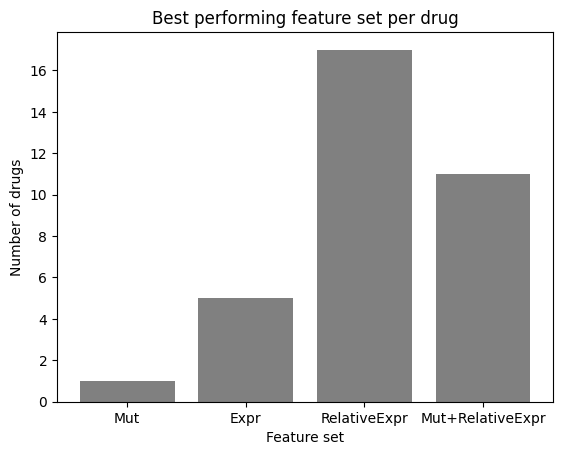

In [39]:
palette = ["grey","orange" ,"red","purple"]
keys = ['Mut', 'Expr', 'RelativeExpr', 'Mut+RelativeExpr']
total_drugs = sum(best_features_counter.values())

bottoms = np.zeros(len(keys))


plt.bar(keys, [best_features_counter[x] for x in keys], color='gray')
plt.xlabel('Feature set')
plt.ylabel('Number of drugs')
plt.title('Best performing feature set per drug')
plt.show()
# TODO: stacked barplot of which results are significant?
# what is the best-performing feature set for each drug?

### Plotting best-performing drugs and p-values

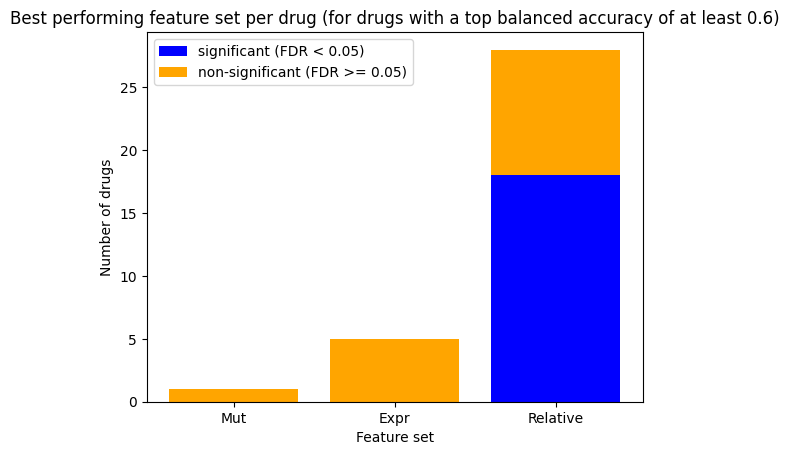

In [40]:
best_features_counter_2 = {}
keys = ['Mut', 'Expr', 'Relative']
best_features_counter_2['Expr'] = best_features_counter['Expr']
best_features_counter_2['Mut'] = best_features_counter['Mut']
best_features_counter_2['Relative'] = best_features_counter['Mut+RelativeExpr'] + best_features_counter['RelativeExpr']
best_features_significant_counter['Relative'] = best_features_significant_counter['Mut+RelativeExpr'] + best_features_significant_counter['RelativeExpr']
best_features_insignificant_counter['Relative'] = best_features_insignificant_counter['Mut+RelativeExpr'] + best_features_insignificant_counter['RelativeExpr']

# 1. plot p<0.01
# 2. plot p<0.05
# other drugs
bottoms = np.zeros(len(keys))

plt.bar(keys, [best_features_significant_counter[x] for x in keys], color='blue', label='significant (FDR < 0.05)')
plt.bar(keys, [best_features_insignificant_counter[x] for x in keys], color='orange', label='non-significant (FDR >= 0.05)',
       bottom = [best_features_significant_counter[x] for x in keys])

plt.legend()
plt.xlabel('Feature set')
plt.ylabel('Number of drugs')
plt.title('Best performing feature set per drug (for drugs with a top balanced accuracy of at least 0.6)')
plt.show()

In [41]:
# how about averaging over all threshold levels?
all_wilcoxon_fdr_corrected.to_csv('all_wilcoxon_fdr_corrected.csv')

In [43]:
# getting some summary statistics of the dataset...
best_features_significant_counter

Counter({'RelativeExpr': 12, 'Mut+RelativeExpr': 6, 'Relative': 18})

In [44]:
best_features_insignificant_counter

Counter({'Expr': 5,
         'Mut+RelativeExpr': 5,
         'RelativeExpr': 5,
         'Mut': 1,
         'Relative': 10})

In [45]:
best_features_counter

Counter({'Expr': 5, 'RelativeExpr': 17, 'Mut+RelativeExpr': 11, 'Mut': 1})

In [48]:
sum(best_features_counter.values())

34

Among all drugs where at least one feature set had a balanced accuracy of at least 0.6 (34 drugs), the relative expression feature set had the best performance in 17 drugs, whle the Mutation + relative expression feature set had 

## Comparing deep learning results with our results

In [ ]:
deep_model_drugs = deep_model_results.drug.unique()

In [ ]:
deep_model_drugs

In [ ]:
selected_drugs = data.Drug.unique()

In [ ]:
selected_drugs

In [ ]:
selected_drugs_2 = [x.split()[0] for x in selected_drugs]
name_map = {x: y for x, y in zip(selected_drugs_2, selected_drugs)}

In [ ]:
overlapping_drugs = set(deep_model_drugs).intersection(selected_drugs_2)

In [ ]:
overlapping_drugs

In [ ]:
drug_results_comparison = {}
drug_results_labels = {}
for drug in overlapping_drugs:
    # calculate the accuracy
    dr = deep_model_results[deep_model_results.drug == drug].copy()
    threshold = thresholds[thresholds.Drug==name_map[drug]]['Threshold']
    ground_truth = drug_data[drug_data.inhibitor==name_map[drug]].copy()
    if len(threshold) < 1:
        print(drug)
        continue
    threshold = threshold.iloc[0]
    ground_truth['label'] = ground_truth['ic50'] > threshold
    ground_truth.index = ground_truth.lab_id
    dr.index = dr.lab_id
    dr['label'] = np.exp(dr['log_IC50_uM']) > threshold
    # create a table of labels
    model_labels = []
    true_labels = []
    for i, row in ground_truth.iterrows():
        if row.lab_id in dr.index:
            model_label = dr.loc[row.lab_id, 'label']
            if isinstance(model_label, pd.Series):
                model_label = model_label.to_list()[0]
            model_labels.append(model_label)
            true_labels.append(row.label)
        else:
            continue
    drug_results_comparison[drug] = {'acc': accuracy_score(true_labels, model_labels),
                                     'balanced_accuracy': balanced_accuracy_score(true_labels, model_labels),
                                     'f1': f1_score(true_labels, model_labels)}
    drug_results_labels[drug] = {'model_labels': model_labels, 'true_labels': true_labels}

In [ ]:
drug_results_comparison = pd.DataFrame(drug_results_comparison).T

In [ ]:
drug_results_comparison